<h1 style='color:GREEN' align="center">NO SHOWS PREDICTABILITY</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv('data.csv')

data.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,awaiting_time_days,appointment_dow
0,0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


In [2]:
data.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [3]:
data.describe()

,Unnamed: 0,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,awaiting_time_days
count,110527.000000,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,55263.000000,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,31906.540939,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,0.000000,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,27631.500000,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55263.000000,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,82894.500000,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,110526.000000,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [4]:
data=data[(data['Age']>=0)&(data['Age']<=100)]
data=data[(data['awaiting_time_days']>=0)&(data['awaiting_time_days']<=30)]
data.shape

(100137, 17)

In [5]:
data_cat=data.select_dtypes(include=[object])

data_num=data.select_dtypes(include=[np.number])

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data_cat=data_cat.apply(le.fit_transform)

data_num=data_num.apply(le.fit_transform)

data_final=pd.concat([data_cat,data_num],axis=1)



<h2 style='color:blue' align="center"> STATISTICAL  CORRELATION HEATMAP </h2>

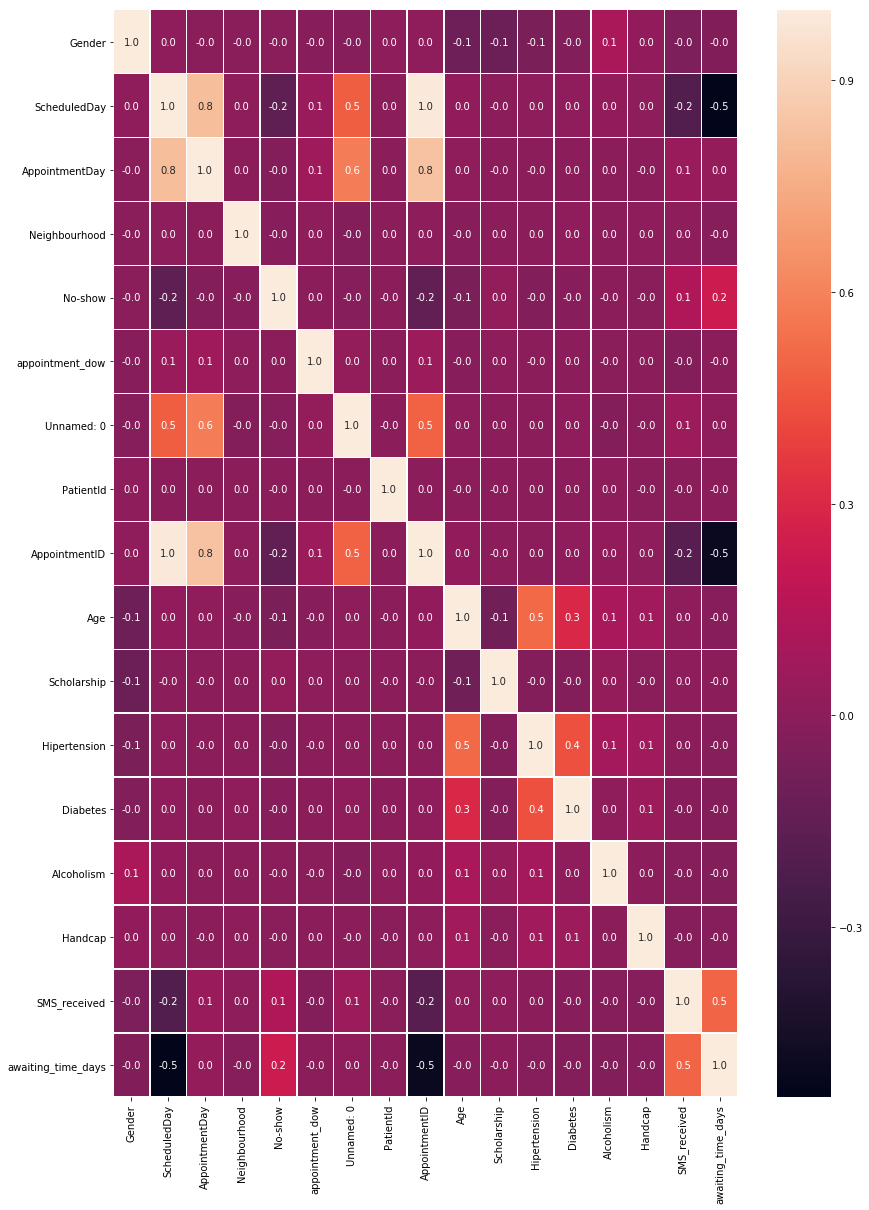

In [6]:
plt.figure(figsize=(14,20))
sb.heatmap(data_final.corr(),annot=True,linewidth=.5,fmt='.1f')

<h2 style='color:RED' align="center"> EXPLORATORY DATA ANALYSIS </h2>

<h2 style='color:blue' align="center"> PLOTTING ON GENDER </h2>

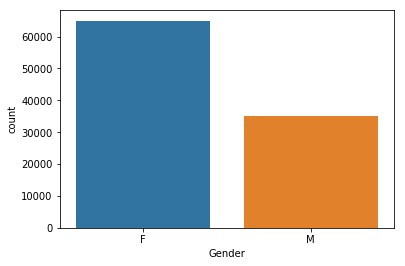

In [7]:
sb.countplot(x='Gender',data=data)

In [8]:
data_final.head()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show,appointment_dow,Unnamed: 0,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,awaiting_time_days
0,0,21,0,39,0,0,0,28042,19564,62,0,1,0,0,0,0,0
1,1,21,0,39,0,0,1,50257,19338,56,0,0,0,0,0,0,0
2,0,21,0,45,0,0,2,14317,19370,62,0,0,0,0,0,0,0
3,0,21,0,54,0,0,3,8219,19532,8,0,0,0,0,0,0,0
4,0,21,0,39,0,0,4,21800,19333,56,0,1,1,0,0,0,0


# DAY OF THE WEEK VS NOSHOW

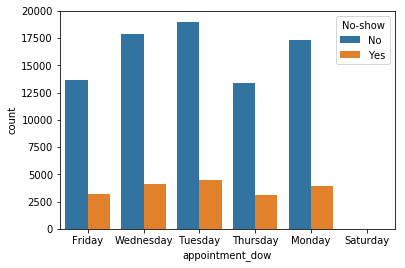

In [9]:
sb.countplot(hue='No-show',x='appointment_dow',data=data)

<h2 style='color:BLACK' align="center"> REPRESENTS ON NO-SHOW </h2>

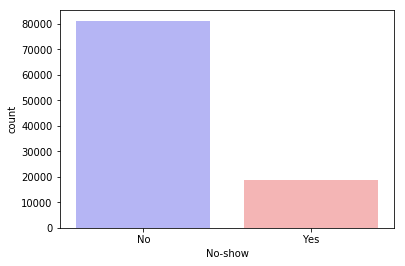

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='No-show',data=data,palette='bwr')
plt.show()

<h2 style='color:blue' align="center">Represents no. of males and females in sex column</h2>

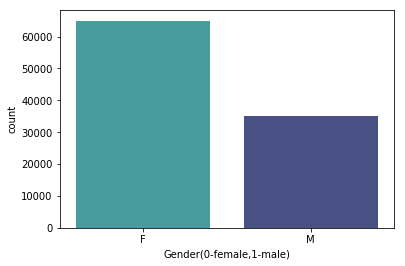

In [11]:
sns.countplot(x='Gender',data=data,palette='mako_r')
plt.xlabel("Gender(0-female,1-male)")
plt.show()

<h2 style='color:blue' align="center"> REPRESENTS ON NO SHOW FOR GENDER</h2>

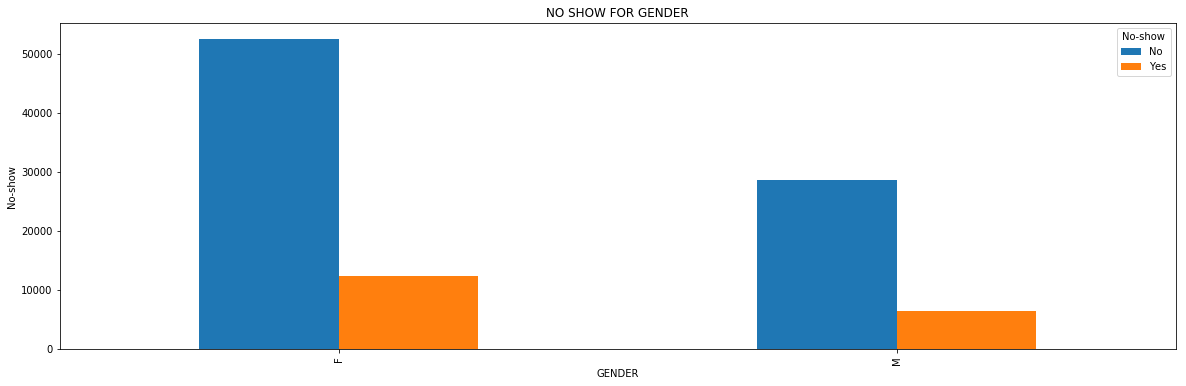

In [12]:
pd.crosstab(data.Gender,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR GENDER")
plt.xlabel("GENDER")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center"> REPRESENTS ON NO SHOW FOR AGE</h2> 

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR HIPERTENSION</h2> 

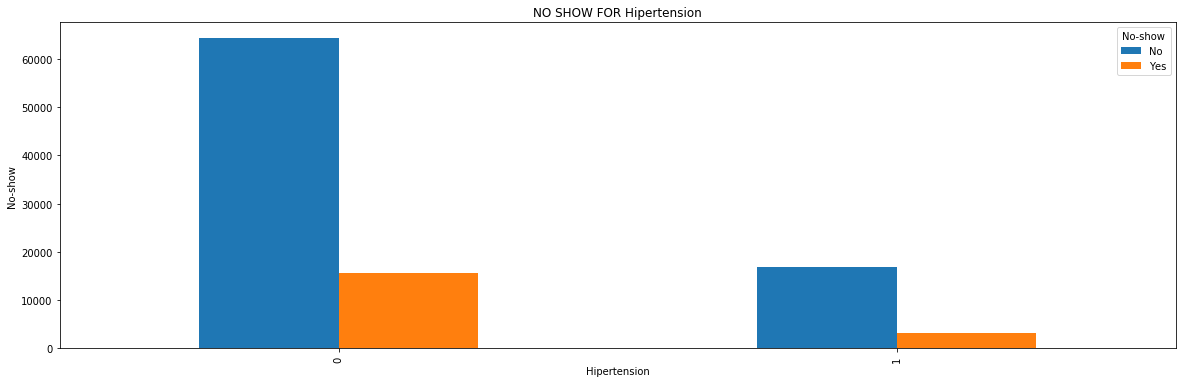

In [13]:
pd.crosstab(data.Hipertension,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Hipertension")
plt.xlabel("Hipertension")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR DIABETES</h2> 

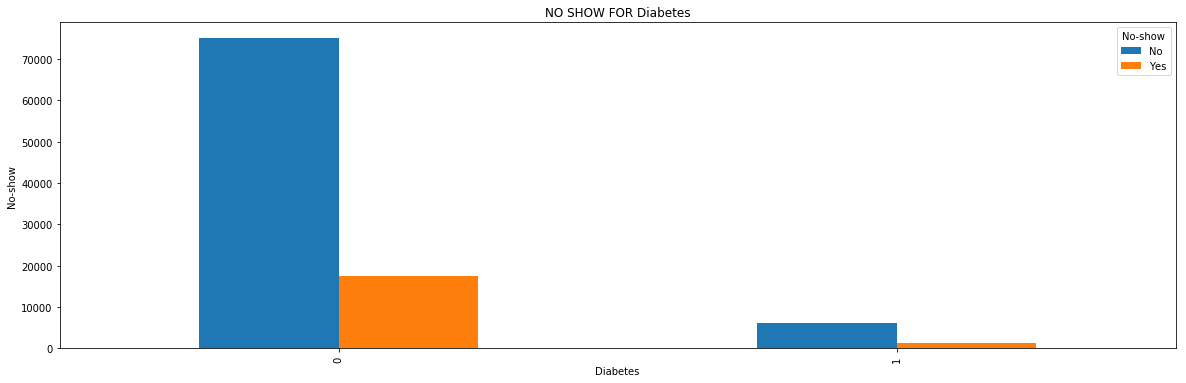

In [14]:
pd.crosstab(data.Diabetes,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Diabetes")
plt.xlabel("Diabetes")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR ALCOHOLISM</h2> 

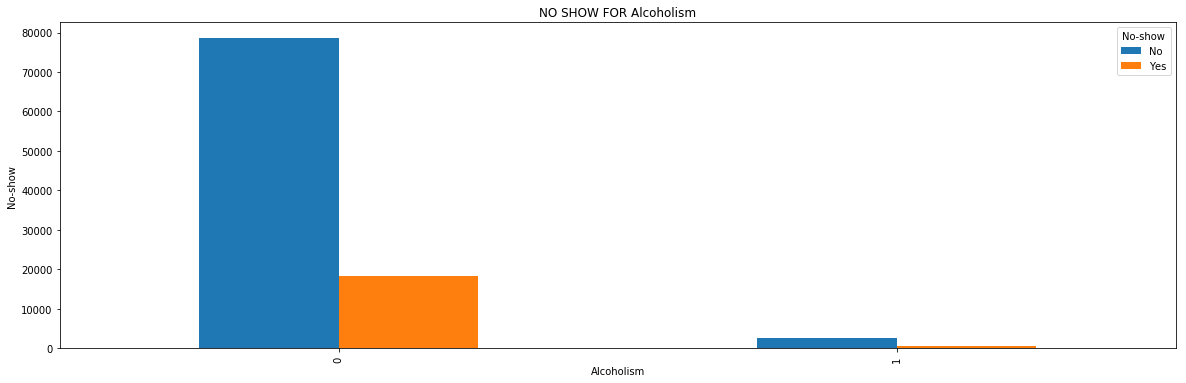

In [15]:
pd.crosstab(data.Alcoholism,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Alcoholism")
plt.xlabel("Alcoholism")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR HANDCAP</h2> 

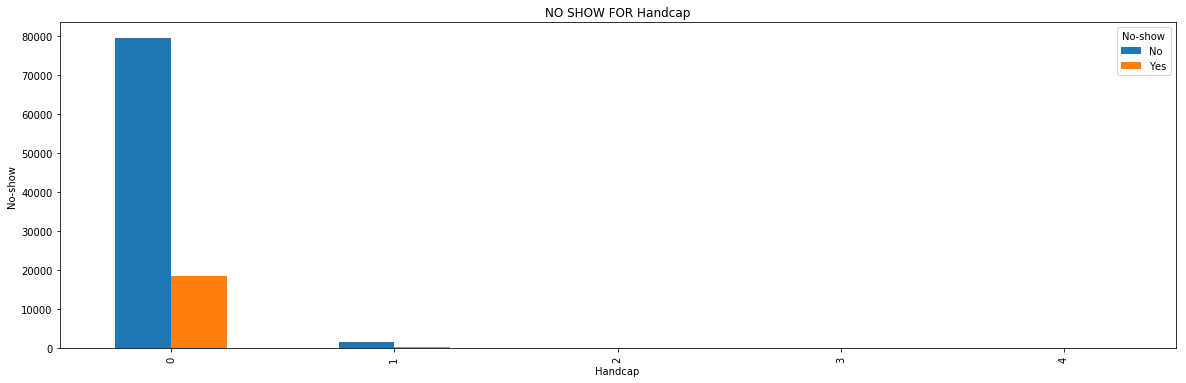

In [16]:
pd.crosstab(data.Handcap,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Handcap")
plt.xlabel("Handcap")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR SMS_RECEIVED</h2> 

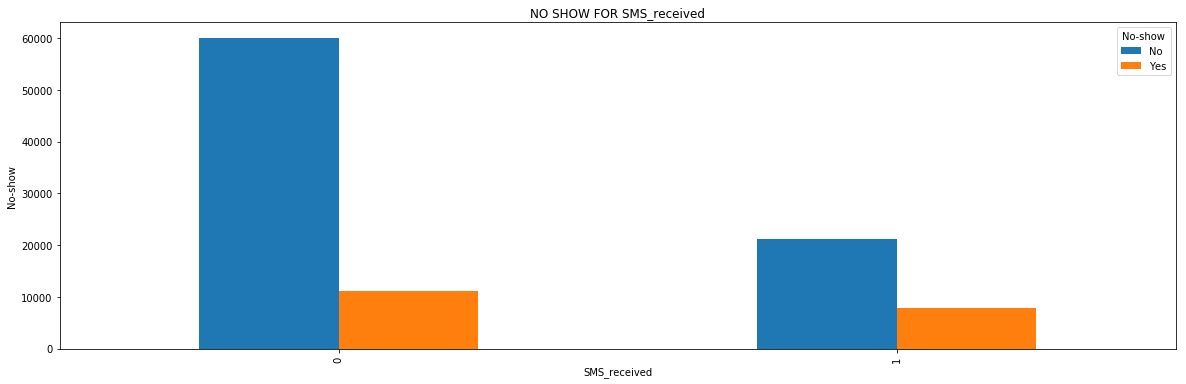

In [17]:
pd.crosstab(data.SMS_received,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR SMS_received")
plt.xlabel("SMS_received")
plt.ylabel('No-show')
plt.show()

In [24]:
cor=data_final.corr()
cor_target=abs(cor["No-show"])
relevant_features=cor_target[cor_target>0.5]
relevant_features

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_final.drop('No-show',1),data_final['No-show'],test_size=.2,random_state=10)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature=SelectKBest(chi2,k=5).fit(X_train,y_train)

#print('Scorelist:',select_feature.scores_)
#print('Feature list:',X_train.columns)

<h2 style='color:blue' align="center">RANDOM FOREST</h2>

In [25]:
X=data_final[['Gender','Neighbourhood','awaiting_time_days','AppointmentID','appointment_dow', 'Age', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]
y=data_final['No-show']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier

lg=RandomForestClassifier()

print(lg.fit(X_train,y_train))

lg.score(X_train,y_train)

predict=lg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(predict,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


0.8012770078072989

In [26]:
from sklearn.metrics import accuracy_score

A=accuracy_score(predict,y_test)
print("ACCURACY SCORE IS :" ,A)

ACCURACY SCORE IS : 0.8012770078072989


In [21]:
#data_final.to_csv('karim.csv')

noshow=pd.read_csv('prediction.csv')



p=lg.predict(noshow)

noshow['PREDICT_NOSHOW1']=p

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 16 

###  NO OF X-FEATURES

In [ ]:
X_test.head()

### NO OF Y-FEATURES

In [ ]:
y_test.head()

### PREDICTION NO-SHOW

In [ ]:
p=lg.predict([[0,91315 ,21 ,29 ,30223 ,97583 ,21 ,0 ,0 ,0 ,0 ,0 ,0]])
print('NO SHOW PREDICTABILITY:',p)

In [ ]:
noshow.to_csv('NOSHOW PREDICTABILTY.csv')